In [1]:
import numpy as np
weights = np.load("weights.npy", allow_pickle=True).item()

weights

{'0.weight': array([[-0.02681571,  0.12191463, -0.18118046, ..., -0.18772516,
          0.08216041, -0.11621477],
        [-0.09656687,  0.21630041, -0.19880483, ..., -0.12695496,
          0.17810158, -0.12821834],
        [ 0.01666375,  0.14333215, -0.18069017, ..., -0.1285617 ,
          0.09634667, -0.15120792],
        ...,
        [-0.01330048, -0.18536872,  0.05513006, ...,  0.08758489,
         -0.04787288,  0.08409974],
        [-0.02785104,  0.1393717 , -0.09015542, ..., -0.19986677,
          0.08479928, -0.17352694],
        [-0.01980693, -0.19492039,  0.18415904, ...,  0.21011347,
         -0.10650454,  0.07835304]], dtype=float32),
 '0.bias': array([ 0.21557613,  0.2612097 ,  0.1857271 , -0.21819825,  0.30405626,
        -0.1534307 ,  0.2113273 , -0.27420738,  0.21833505,  0.26264837,
         0.15402412, -0.278202  , -0.18898144,  0.2483819 , -0.23247567,
         0.1798676 ,  0.23167495, -0.2174469 , -0.2548375 ,  0.16395058,
         0.2919161 ,  0.209902  ,  0.2497434

(128, 192)


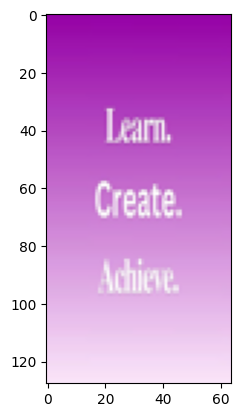

In [2]:
from PIL import Image
image = Image.open("test_dataset/purple/Dropped Image (6).png").convert('RGB').resize((64, 128))
image = np.array(image)

from matplotlib.pyplot import imshow
imshow(image)

image = image.reshape(128, -1) / 255.0
print(image.shape)

In [3]:
list(weights.keys())

['0.weight', '0.bias', '2.weight', '2.bias']

In [4]:
print(image[0].shape)
print(weights['0.weight'].shape)

(192,)
(64, 192)


In [5]:
x = np.matmul(image[0], weights['0.weight'].T)
x = x + weights['0.bias']

In [6]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

x = sigmoid(x)

In [7]:
x = np.matmul(x, weights['2.weight'].T)
x = x + weights['2.bias']
x = sigmoid(x)

print(x)

[0.99976948]


In [8]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def run_model(row, weights):
    x = row

    x = x @ weights['0.weight'].T + weights['0.bias']
    x = sigmoid(x)
    x = x @ weights['2.weight'].T + weights['2.bias']
    x = sigmoid(x)

    return x

In [ ]:
# We can iterate over each image row and see how many are purple
num_purple = 0
num_total = 0
for row in image:
    is_purple = run_model(row, weights) > 0.5
    if is_purple:
        num_purple += 1
    
    num_total += 1


print(num_purple / num_total * 100, "%")

95.3125 %


In [ ]:
# Or we can just pass the image and use batching which is more efficient
result = run_model(image, weights) > 0.5
print(result.sum() / len(result) * 100, "%")

95.3125 %


0.0 %


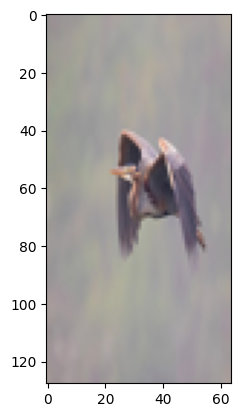

In [13]:
from PIL import Image
image = Image.open("test_dataset/nonpurple/Dropped Image (6).png").convert('RGB').resize((64, 128))
image = np.array(image)

from matplotlib.pyplot import imshow
imshow(image)

image = image.reshape(128, -1) / 255.0

result = run_model(image, weights) > 0.5
print(result.sum() / len(result) * 100, "%")